In [ ]:
from google.colab import files
uploaded = files.upload()

Saving investments.csv to investments.csv


In [ ]:
print(__doc__)

import seaborn as sns

sns.set_context("poster")

Automatically created module for IPython interactive environment


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from numpy import where
from matplotlib import pyplot

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB



In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['investments.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114506 entries, 0 to 114505
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114506 non-null  object 
 1   company_name             114505 non-null  object 
 2   company_category_list    111242 non-null  object 
 3   company_market           111240 non-null  object 
 4   company_country_code     107147 non-null  object 
 5   company_state_code       79158 non-null   object 
 6   company_region           107147 non-null  object 
 7   company_city             105801 non-null  object 
 8   investor_permalink       114440 non-null  object 
 9   investor_name            114440 non-null  object 
 10  investor_category_list   30507 non-null   object 
 11  investor_market          30455 non-null   object 
 12  investor_country_code    86521 non-null   object 
 13  investor_state_code      62274 non-null   object 
 14  inve

In [ ]:
#replace all Nan to 0 in raised_amount_usd column
df['raised_amount_usd'] = df['raised_amount_usd'].fillna(0)

In [ ]:
#convert column raised_amount_usd from float to int
df = df.astype({"raised_amount_usd":'int'})

In [ ]:
# removing features
df = df.drop(['investor_category_list','investor_market','funded_at', 'company_state_code','investor_state_code','funding_round_code',
                      'funded_month','funded_quarter','funding_round_permalink','company_permalink','investor_permalink'], axis=1)

In [ ]:
#Dropping all the null value
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77929 entries, 8 to 114498
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company_name           77929 non-null  object
 1   company_category_list  77929 non-null  object
 2   company_market         77929 non-null  object
 3   company_country_code   77929 non-null  object
 4   company_region         77929 non-null  object
 5   company_city           77929 non-null  object
 6   investor_name          77929 non-null  object
 7   investor_country_code  77929 non-null  object
 8   investor_region        77929 non-null  object
 9   investor_city          77929 non-null  object
 10  funding_round_type     77929 non-null  object
 11  funded_year            77929 non-null  int64 
 12  raised_amount_usd      77929 non-null  int64 
 13  Y                      77929 non-null  object
dtypes: int64(2), object(12)
memory usage: 8.9+ MB


In [ ]:
# check missing values in variables
df.isnull().sum()

company_name             0
company_category_list    0
company_market           0
company_country_code     0
company_region           0
company_city             0
investor_name            0
investor_country_code    0
investor_region          0
investor_city            0
funding_round_type       0
funded_year              0
raised_amount_usd        0
Y                        0
dtype: int64

In [ ]:
#counting Y values in %

df.Y.value_counts(normalize=True)

Yes    0.898985
No     0.101015
Name: Y, dtype: float64

In [ ]:
# Spliting data

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X, y = make_classification(n_samples=10000, n_features=2,

                           n_redundant=0, n_classes=2,

                           n_clusters_per_class=1,

                           weights=[0.2, 0.8],

                           class_sep=0.8, random_state=10)

counter = Counter(y)
print(counter)

Counter({1: 7977, 0: 2023})


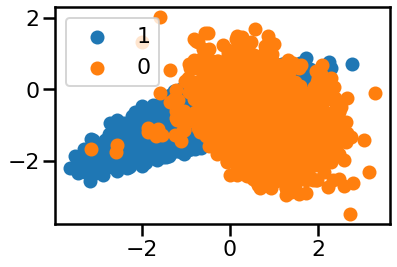

In [ ]:
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

###Resumpling with RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(random_state=10)

X_rus, y_rus = rus.fit_resample(X, y)

print(sorted(Counter(y_rus).items()))

[(0, 2023), (1, 2023)]


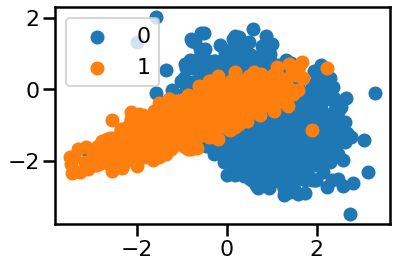

In [ ]:
# scatter plot of examples by class label
for label, _ in Counter(y_rus).items():
    row_ix = where(y_rus == label)[0]
    pyplot.scatter(X_rus[row_ix, 0], X_rus[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

###Pipeline of transforms with a final estimator RandomUnderSampler

In [ ]:
steps = [('under', RandomUnderSampler()), ('model', GaussianNB())]
pipeline = Pipeline(steps=steps)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_rus, y_rus, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.854


###Resumpling with RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=0)

X_ros, y_ros = ros.fit_resample(X, y)

print(sorted(Counter(y_ros).items()))

[(0, 7977), (1, 7977)]


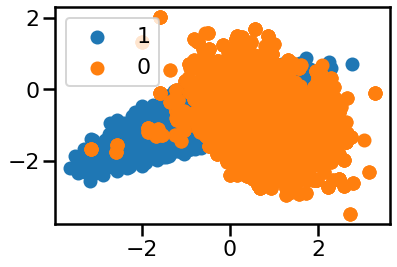

In [ ]:
# scatter plot of examples by class label
for label, _ in Counter(y_ros).items():
    row_ix = where(y_ros == label)[0]
    pyplot.scatter(X_ros[row_ix, 0], X_ros[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Pipeline of transforms with a final estimator for RandomOverSampler

In [ ]:
steps = [('over', RandomOverSampler()), ('model', GaussianNB())]
pipeline = Pipeline(steps=steps)

In [ ]:
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_ros, y_ros, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.863


###Combining Random Oversampling and Undersampling

In [ ]:
# instantiating over and under sampler
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)

In [ ]:
X_over, y_over = over.fit_resample(X, y)
print(f"Oversampled: {Counter(y_over)}")

Oversampled: Counter({1: 7977, 0: 3988})


In [ ]:
# now to comine under sampling 
X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")
print(sorted(Counter(y_combined_sampling).items()))

Combined Random Sampling: Counter({1: 4985, 0: 3988})
[(0, 3988), (1, 4985)]


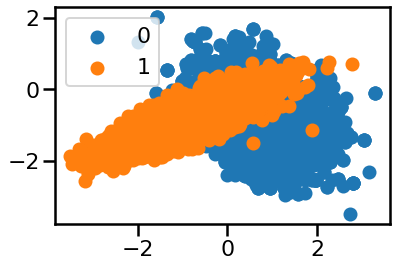

In [ ]:
# scatter plot of examples by class label
for label, _ in Counter(y_combined_sampling).items():
    row_ix = where(y_combined_sampling == label)[0]
    pyplot.scatter(X_combined_sampling[row_ix, 0], X_combined_sampling[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [ ]:
steps = [('over', RandomOverSampler()), ('under', RandomUnderSampler()), ('model', GaussianNB())]
pipeline = Pipeline(steps=steps)

In [ ]:
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_combined_sampling, y_combined_sampling, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.857


### Train-Test Split for Evaluating Machine Learning

In [ ]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.3,random_state=45)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11167, 2) (4787, 2) (11167,) (4787,)


### ML Naive Bayes Classifier

In [ ]:
# fit the model
model = GaussianNB()
model = model.fit(X_train, y_train)

In [ ]:
# make predictions
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
# evaluate predictions
acc = accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % acc)

Accuracy: 0.855


In [ ]:
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)

tn, fp, fn, tp=cf.ravel()
print ("True Positives(TP) : ", tp,", False Positives(FP): ", fp,", True Negatives(TN): ", tn,", False Negatives(FN):", fn)

Confusion Matrix
[[2100  291]
 [ 405 1991]]
True Positives(TP) :  1991 , False Positives(FP):  291 , True Negatives(TN):  2100 , False Negatives(FN): 405


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


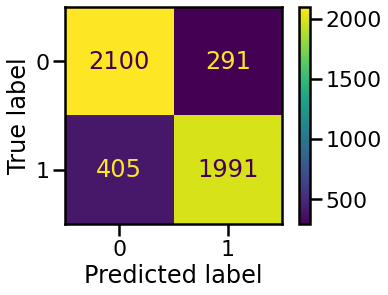

In [ ]:
plot_confusion_matrix(model, X_test, y_test, labels=[0, 1])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2391
           1       0.87      0.83      0.85      2396

    accuracy                           0.85      4787
   macro avg       0.86      0.85      0.85      4787
weighted avg       0.86      0.85      0.85      4787



In [ ]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred, average=None)

print('ROC AUC : {:.4f}'.format(ROC_AUC))



ROC AUC : 0.8546
